## Imports

In [1]:
import json
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from imblearn.over_sampling import SMOTE, SMOTEN

## Functions

In [3]:
def load_dummy():
    return np.array([np.random.randint(100, size=3) for i in range(100)]), np.array([np.random.randint(10, size=1)[0] for i in range(100)])

In [4]:
def load_json(filename):
    with open(filename) as f:
        d = json.load(f)
    return d["x"], d["y"]

In [5]:
def load_csv(filename):
    with open(filename) as f:
        csvr = csv.reader(f)
        rows = []
        for r in csvr:
            rows.append(r)
    return rows

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [7]:
def eval_LR(x, filename):
    with open(filename) as f:
        d = json.load(f)
    p_w = d["w"]
    p_i = d["i"]
    ans = sigmoid(p_w@x + p_i)
    if ans > 0.5:
        return 1
    else:
        return 0

## Training

In [8]:
r1 = load_csv("../../data/dataset_annotated_v1.csv")
r2 = load_csv("../../data/dataset_annotated_v2.csv")
r3 = load_csv("../../data/dataset_annotated_v3.csv")
r = r1[1:] + r2[1:] + r3[1:]

In [9]:
SS = 0.29

In [10]:
x = []
y = []

for i in r:
    x.append([int(j) for j in i[3:6]])
    y.append(int(i[6]))

print(Counter(y))

oversample = SMOTEN(random_state=42, sampling_strategy=SS)
x, y = oversample.fit_resample(x, y)

print(Counter(y))

x = np.asarray(x, dtype='float64')
y = np.asarray(y, dtype='float64')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

lf = linear_model.LogisticRegression()

lf.fit(x_train, y_train)

y_pred = lf.predict(x_test)

Counter({1: 1001, 0: 169})
Counter({1: 1001, 0: 290})


## SS Tune

In [11]:
SS_TUNE = []

In [12]:
for SS in range(25, 101):
    SS = float(SS)/100
    x = []
    y = []

    for i in r:
        x.append([int(j) for j in i[3:6]])
        y.append(int(i[6]))

    oversample = SMOTEN(random_state=42, sampling_strategy=SS)
    x, y = oversample.fit_resample(x, y)


    x = np.asarray(x, dtype='float64')
    y = np.asarray(y, dtype='float64')

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

    lf = linear_model.LogisticRegression()

    lf.fit(x_train, y_train)

    y_pred = lf.predict(x_test)
    report = classification_report(y_pred, y_test, output_dict=True)
    SS_TUNE.append((report["accuracy"], report["1.0"]["f1-score"], report["0.0"]["f1-score"], SS))

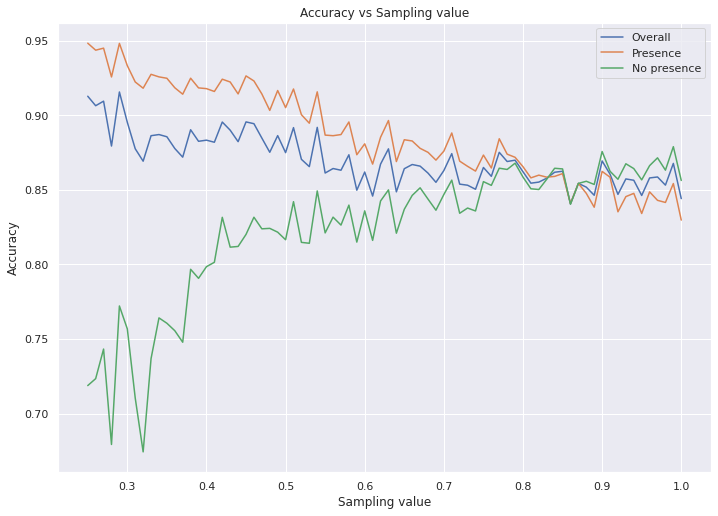

In [14]:
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax1 = sns.lineplot(x=[x[3] for x in SS_TUNE], y=[x[0] for x in SS_TUNE], label = "Overall")
ax2 = sns.lineplot(x=[x[3] for x in SS_TUNE], y=[x[1] for x in SS_TUNE], label = "Presence")
ax3 = sns.lineplot(x=[x[3] for x in SS_TUNE], y=[x[2] for x in SS_TUNE], label = "No presence")
ax1.set(xlabel = "Sampling value", ylabel = "Accuracy", title = "Accuracy vs Sampling value")
plt.show()

In [15]:
SS_TUNE.sort(reverse=True)

In [16]:
SS_TUNE[:10]

[(0.9156908665105387, 0.9482758620689654, 0.7721518987341773, 0.29),
 (0.9128329297820823, 0.9484240687679084, 0.71875, 0.25),
 (0.9095238095238095, 0.9450867052023122, 0.7432432432432433, 0.27),
 (0.9064748201438849, 0.9437229437229437, 0.7234042553191489, 0.26),
 (0.8956158663883089, 0.926470588235294, 0.8201438848920864, 0.45),
 (0.8955223880597015, 0.9242658423493044, 0.831615120274914, 0.42),
 (0.8953488372093024, 0.9333333333333332, 0.7567567567567567, 0.3),
 (0.8944099378881988, 0.9230769230769231, 0.8316831683168318, 0.46),
 (0.8919449901768173, 0.9157733537519143, 0.8493150684931507, 0.54),
 (0.8917835671342685, 0.9176829268292682, 0.8421052631578947, 0.51)]

In [17]:
SS = SS_TUNE[0][3]

In [18]:
x = []
y = []

for i in r:
    x.append([int(j) for j in i[3:6]])
    y.append(int(i[6]))

print(Counter(y))

oversample = SMOTEN(random_state=42, sampling_strategy=SS)
x, y = oversample.fit_resample(x, y)

print(Counter(y))

x = np.asarray(x, dtype='float64')
y = np.asarray(y, dtype='float64')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

lf = linear_model.LogisticRegression()

lf.fit(x_train, y_train)
y_pred = lf.predict(x_test)

Counter({1: 1001, 0: 169})
Counter({1: 1001, 0: 290})


## Results

In [19]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.69      0.88      0.77        69
         1.0       0.98      0.92      0.95       358

    accuracy                           0.92       427
   macro avg       0.83      0.90      0.86       427
weighted avg       0.93      0.92      0.92       427



In [20]:
def print_misclass():
    for indx, y1 in enumerate(y_pred_1):
        if y1 != y_test_1[indx]:
            print(x_test_1[indx])

In [21]:
lf.score(x_test, y_test)

0.9156908665105387

In [22]:
lf.coef_, lf.intercept_

(array([[-0.51074086,  0.31830055,  1.10456205]]), array([-0.74347666]))

In [23]:
lf.coef_.tolist()[0], lf.intercept_.tolist()[0]

([-0.5107408642979628, 0.3183005547682906, 1.1045620458329213],
 -0.7434766608247968)

In [24]:
with open("./weights_lr.json", "w") as f:
    json.dump({
        "w" : lf.coef_.tolist()[0],
        "i": lf.intercept_.tolist()[0]
    }, f)

## Testing

In [25]:
filename = "weights_lr.json"

In [26]:
y_pred = [eval_LR(x, filename) for x in x_test]

In [27]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.69      0.88      0.77        69
           1       0.98      0.92      0.95       358

    accuracy                           0.92       427
   macro avg       0.83      0.90      0.86       427
weighted avg       0.93      0.92      0.92       427

